In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator

The variables listed represent objects from the Qiskit library, which is used for quantum computing. Here's an explanation of each variable:

1. **Operator**: This is a class from `qiskit.quantum_info`. It represents a quantum operator, which can be used to describe unitary operations or other transformations in quantum mechanics.

2. **Statevector**: This is another class from `qiskit.quantum_info`. It represents the state vector of a quantum system, which is a mathematical representation of the quantum state.

3. **X**: This is a `QuantumRegister` object with 1 qubit, named "X". Quantum registers are used to hold qubits in a quantum circuit.

4. **Y**: This is another `QuantumRegister` object with 1 qubit, named "Y".

5. **circuit**: This is a `QuantumCircuit` object. It represents a quantum circuit that operates on the quantum registers `X` and `Y`. The circuit likely contains quantum gates and operations.

6. **qc**: This is another `QuantumCircuit` object, separate from `circuit`. It represents a different quantum circuit.

7. **state**: This is a `Statevector` object. It represents the quantum state of a system with 2 qubits. The state vector `[0.70710678+0.j, 0.+0.j, 0.+0.j, 0.70710678+0.j]` indicates a superposition state, with equal probability amplitudes for the first and last basis states.

These variables are already defined in the Jupyter Notebook and can be used in subsequent cells without redefining them.

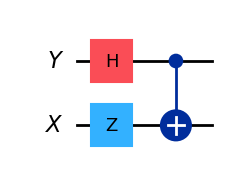

<IPython.core.display.Latex object>

In [ ]:

X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
circuit = QuantumCircuit(Y,X)
circuit.h(Y)
circuit.z(X)
circuit.cx(Y, X)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

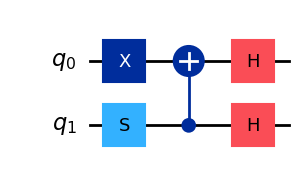

<IPython.core.display.Latex object>

In [2]:
qc = QuantumCircuit(2)
qc.x(0)
qc.s(1)
qc.cx(1, 0)
qc.h(0)
qc.h(1)
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

In [ ]:
def chsh_game(strategy):
    # This function runs the CHSH game, using the strategy (a function
    # from two bits to two bits), returning 1 for a win and 0 for a loss.

    # Choose x and y randomly
    x, y = random.randint(0, 2), random.randint(0, 2)

    # Use the strategy to determine a and b
    a, b = strategy(x, y)

    # Decide if the strategy wins or loses
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [ ]:
def chsh_circuit(x, y):
    # This function creates a `QuantumCircuit` implementing the quantum
    # strategy described above (including the e-bit preparation).

    qc = QuantumCircuit(2, 2)

    # Prepare an e-bit
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob's actions
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc